In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
import numpy as np
import zipfile

In [ ]:
! kaggle datasets download nikhilnayak123/5-million-song-lyrics-dataset --force

100% 3.09G/3.09G [02:01<00:00, 28.6MB/s]
100% 3.09G/3.09G [02:01<00:00, 27.2MB/s]


In [ ]:
import pandas as pd
import zipfile

# Specify the path to your zip file
path_to_zip_file = '/content/5-million-song-lyrics-dataset.zip'
csv_file_name = 'ds2.csv'  # replace with the name of your csv file inside the zip

chunk_size = 10000  # adjust this value depending on your available memory
chunks = []

# Extract the CSV file from the zip archive
with zipfile.ZipFile(path_to_zip_file, 'r') as archive:
    with archive.open(csv_file_name) as file:
        for chunk in pd.read_csv(file, chunksize=chunk_size, na_values="N/A"):
            # processing can be done inside this loop to reduce memory footprint
            chunks.append(chunk)

# Concatenate all chunks into one DataFrame
df = pd.concat(chunks, axis=0)

In [ ]:
df

,title,tag,artist,year,views,features,lyrics,id
0,Killa Cam,rap,Cam'ron,2004,173166,"{""Cam\\'ron"",""Opera Steve""}","[Chorus: Opera Steve & Cam'ron]\nKilla Cam, Ki...",1
1,Can I Live,rap,JAY-Z,1996,468624,{},"[Produced by Irv Gotti]\n\n[Intro]\nYeah, hah,...",3
2,Forgive Me Father,rap,Fabolous,2003,4743,{},Maybe cause I'm eatin\nAnd these bastards fien...,4
3,Down and Out,rap,Cam'ron,2004,144404,"{""Cam\\'ron"",""Kanye West"",""Syleena Johnson""}",[Produced by Kanye West and Brian Miller]\n\n[...,5
4,Fly In,rap,Lil Wayne,2005,78271,{},"[Intro]\nSo they ask me\n""Young boy\nWhat you ...",6
...,...,...,...,...,...,...,...,...
5913406,Raise Our Hands,pop,"Culture Code, Pag & Mylo",2016,3,"{Elex,""Culture Code / Pag & Mylo""}",[Verse 1]\nHere our purpose feels alive\nWe ar...,7882845
5913407,CEO,rap,Antropolita,2022,5,{},Jestem CEO w tym\nTo jara twoją bitch\nNikt na...,7882846
5913408,JokAir - Big Drip ft. ARÓN LineMa Traducción ...,rap,Genius Traducciones al Espaol,2022,1,"{""Genius Traducciones al Español""}",[Instrumental],7882847
5913409,New Number,country,Alana Springsteen,2022,1,{},"[Verse 1]\nYou need a new number, one that ain...",7882848


In [ ]:
df.columns

Index(['title', 'tag', 'artist', 'year', 'views', 'features', 'lyrics', 'id'], dtype='object')

In [ ]:
# Fill NaN values in 'title' column with an empty string
df['title'] = df['title'].fillna('')

# Remove all rows that contain "translation" in the 'title' column
df = df[~df['title'].str.lower().str.contains('translation')]

In [ ]:
# Define a list of columns to drop
columns_to_drop = ['features', 'views', 'id']

# Check if these columns exist in the DataFrame, and if so, drop them
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

In [ ]:
# Step 1: Identify the columns with missing values or empty strings
columns_to_check = ['artist', 'year', 'title', 'lyrics']
rows_to_remove = df[df[columns_to_check].isna().any(axis=1) | (df[columns_to_check] == "").any(axis=1)].index

# Step 2: Remove the rows that contain missing values or empty strings
df = df.drop(rows_to_remove)

In [ ]:
# Step 1: Identify the rows that contain the tag "misc"
rows_to_remove = df[df['tag'] == 'misc'].index

# Step 2: Remove the identified rows
df = df.drop(rows_to_remove)

In [ ]:
import re
import pandas as pd

def clean_lyrics(text):
    # Remove any leading or trailing whitespace characters
    text = text.strip()
    # Replace newline characters with periods
    text = text.replace('\n', '.')
    # Remove any apostrophes or double quotes
    text = re.sub(r'[\'\"]', '', text)
    # Remove any leading or trailing square brackets and their contents
    text = re.sub(r'\[.*?\]', '', text)
    # Split the text into sentences using regular expressions
    sentences = re.split(r'(?<=[^A-Z].[.?]) +(?=[A-Z])', text)
    # Remove any leading whitespace characters from each sentence
    cleaned_sentences = [sentence.lstrip() for sentence in sentences]
    # Join the sentences back into a single string
    cleaned_text = ' '.join(cleaned_sentences)
    return cleaned_text

# Assuming you've already loaded your DataFrame as `df`

# Clean the 'lyrics' column using the clean_lyrics function
df['lyrics'] = df['lyrics'].apply(clean_lyrics)

In [ ]:
# Convert 'title' to string and remove rows that have non-Latin words
df = df[df['title'].astype(str).apply(lambda x: x.isascii())]

In [ ]:
df

,title,tag,artist,year,lyrics
0,Killa Cam,rap,Cam'ron,2004,".Killa Cam, Killa Cam, Cam.Killa Cam, Killa Ca..."
1,Can I Live,rap,JAY-Z,1996,"...Yeah, hah, yeah, Roc-A-Fella.We invite you ..."
2,Forgive Me Father,rap,Fabolous,2003,Maybe cause Im eatin.And these bastards fiend ...
3,Down and Out,rap,Cam'ron,2004,"...Ugh, Killa!.Baby!.Kanye, this that 1970s He..."
4,Fly In,rap,Lil Wayne,2005,.So they ask me.Young boy.What you gon do the ...
...,...,...,...,...,...
5913403,Ocean,pop,Effemar,2022,.Dance for me now.Keeping yourself moving.Your...
5913404,64 Bars,rap,Rapido,2022,"..Ja, ja....R-A-H, Merhaba, alles was ich mach..."
5913406,Raise Our Hands,pop,"Culture Code, Pag & Mylo",2016,.Here our purpose feels alive.We are more than...
5913407,CEO,rap,Antropolita,2022,Jestem CEO w tym.To jara twoją bitch.Nikt na m...


In [ ]:
# Remove non-ASCII characters from the 'lyrics' column using encode and decode
df['lyrics'] = df['lyrics'].apply(lambda x: str(x).encode("ascii", "ignore").decode("ascii"))

In [ ]:
# Select rows where the year is 1950 or later
df = df[df['year'] >= 1950]

In [ ]:
# remove rows that have non-Latin words
df = df[df['lyrics'].apply(lambda x: x.isascii())]

In [ ]:
import gc


# Run the garbage collector
gc.collect()

54

In [ ]:
df

,title,tag,artist,year,lyrics
0,Killa Cam,rap,Cam'ron,2004,".Killa Cam, Killa Cam, Cam.Killa Cam, Killa Ca..."
1,Can I Live,rap,JAY-Z,1996,"...Yeah, hah, yeah, Roc-A-Fella.We invite you ..."
2,Forgive Me Father,rap,Fabolous,2003,Maybe cause Im eatin.And these bastards fiend ...
3,Down and Out,rap,Cam'ron,2004,"...Ugh, Killa!.Baby!.Kanye, this that 1970s He..."
4,Fly In,rap,Lil Wayne,2005,.So they ask me.Young boy.What you gon do the ...
...,...,...,...,...,...
5913403,Ocean,pop,Effemar,2022,.Dance for me now.Keeping yourself moving.Your...
5913404,64 Bars,rap,Rapido,2022,"..Ja, ja....R-A-H, Merhaba, alles was ich mach..."
5913406,Raise Our Hands,pop,"Culture Code, Pag & Mylo",2016,.Here our purpose feels alive.We are more than...
5913407,CEO,rap,Antropolita,2022,Jestem CEO w tym.To jara twoj bitch.Nikt na mo...


In [ ]:
!pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install fasttext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!wget https://dl.fbaipublicfiles.com/fasttext/supervised-models/lid.176.bin

--2023-05-26 14:23:03--  https://dl.fbaipublicfiles.com/fasttext/supervised-models/lid.176.bin
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.226.58.35, 13.226.58.21, 13.226.58.71, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.226.58.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 131266198 (125M) [application/octet-stream]
Saving to: ‘lid.176.bin’

lid.176.bin         100%[===================>] 125.18M  69.3MB/s    in 1.8s    

2023-05-26 14:23:05 (69.3 MB/s) - ‘lid.176.bin’ saved [131266198/131266198]



In [ ]:
import pandas as pd
import numpy as np
import fasttext
from multiprocessing import Pool
from tqdm import tqdm

# Load FastText's language identification model
MODEL = fasttext.load_model('/content/lid.176.bin')

def detect_language(text):
    predictions = MODEL.predict(text, k=1)  # k is the number of predictions you want to get
    # Predictions is a tuple where the first element is a list of labels and the second is a list of corresponding probabilities
    language = predictions[0][0].replace("__label__", "")  # FastText labels are of the form "__label__en". We remove the "__label__" part.
    return language

def detect_language_with_df(df):
    df['language'] = df['lyrics'].apply(detect_language)
    return df

def parallelize_dataframe(df, func, n_cores=4):
    df_split = np.array_split(df, n_cores)
    pool = Pool(n_cores)
    df = pd.concat(pool.map(func, df_split))
    pool.close()
    pool.join()
    return df

# Set your batch size
batch_size = 5000

# df is your dataframe and 'text' is the column with the text you want to detect language
for i in tqdm(range(0, df.shape[0], batch_size), total=len(range(0, df.shape[0], batch_size))):
    df_batch = df[i:i+batch_size].copy()
    df_batch = parallelize_dataframe(df_batch, detect_language_with_df)
    if i == 0:
        df_final = df_batch
    else:
        df_final = pd.concat([df_final, df_batch])

df = df_final.reset_index(drop=True)

100%|██████████| 870/870 [1:55:43<00:00,  7.98s/it]


In [ ]:
def clean_extra_periods(text):
    # Replace multiple periods with a single period
    text = re.sub('\.{2,}', '.', text)
    return text

In [ ]:
# Assuming your DataFrame is named df and the column you want to clean is 'lyrics'
df['lyrics'] = df['lyrics'].apply(clean_extra_periods)

In [ ]:
# Keep only rows where the length of the 'lyrics' column is greater than or equal to 40
df = df[df['lyrics'].str.len() >= 40]

In [ ]:
df

,title,tag,artist,year,lyrics,language
0,Killa Cam,rap,Cam'ron,2004,".Killa Cam, Killa Cam, Cam.Killa Cam, Killa Ca...",en
1,Can I Live,rap,JAY-Z,1996,".Yeah, hah, yeah, Roc-A-Fella.We invite you to...",en
2,Forgive Me Father,rap,Fabolous,2003,Maybe cause Im eatin.And these bastards fiend ...,en
3,Down and Out,rap,Cam'ron,2004,".Ugh, Killa!.Baby!.Kanye, this that 1970s Hero...",en
4,Fly In,rap,Lil Wayne,2005,.So they ask me.Young boy.What you gon do the ...,en
...,...,...,...,...,...,...
4345783,Ocean,pop,Effemar,2022,.Dance for me now.Keeping yourself moving.Your...,en
4345784,64 Bars,rap,Rapido,2022,".Ja, ja.R-A-H, Merhaba, alles was ich mach ist...",de
4345785,Raise Our Hands,pop,"Culture Code, Pag & Mylo",2016,.Here our purpose feels alive.We are more than...,en
4345786,CEO,rap,Antropolita,2022,Jestem CEO w tym.To jara twoj bitch.Nikt na mo...,pl


In [ ]:
# Save DataFrame to csv
df.to_csv('dataframe.csv', index=False)

# Compress the csv file into a zip file
import zipfile

with zipfile.ZipFile('dataframe.zip', 'w') as zip_ref:
    zip_ref.write('dataframe.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!cp dataframe.zip /content/drive/MyDrive/

KeyboardInterrupt: ignored

In [ ]:
df['language'].values_counts()

AttributeError: ignored

<ipython-input-29-62da9e3095d1>:13: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_5_languages = top_5_languages.append(pd.Series([other_languages], index=['Other']))


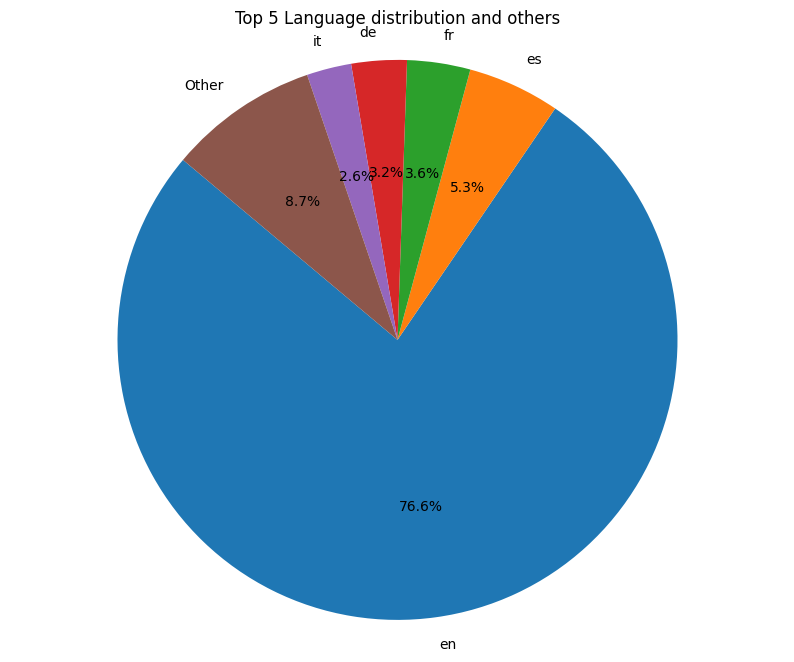

In [ ]:
import matplotlib.pyplot as plt

# Get the count of each language
language_counts = df['language'].value_counts()

# Select the top 5 languages
top_5_languages = language_counts[:5]

# Sum the counts of the rest of the languages
other_languages = language_counts[5:].sum()

# Append 'other' to the top_5_languages series
top_5_languages = top_5_languages.append(pd.Series([other_languages], index=['Other']))

# Create a pie chart
plt.figure(figsize=(10,8))
plt.pie(top_5_languages, labels = top_5_languages.index, autopct='%1.1f%%', startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.title('Top 5 Language distribution and others')
plt.show()

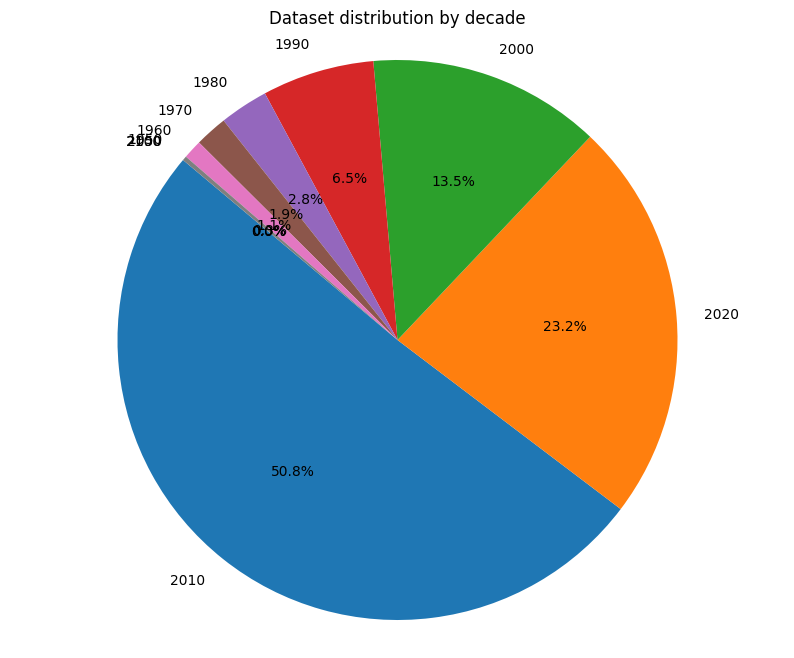

In [ ]:
# Convert years to decades
df['decade'] = (df['year'] // 10) * 10

# Count the number of occurrences of each decade
decade_counts = df['decade'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(decade_counts, labels=decade_counts.index.astype(str), autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.title('Dataset distribution by decade')
plt.show()

In [ ]:
en_df = df[df['language'] == 'en']

In [ ]:
# Save DataFrame to csv
en_df.to_csv('en_df.csv', index=False)

# Compress the csv file into a zip file
import zipfile

with zipfile.ZipFile('en_df.zip', 'w') as zip_ref:
    zip_ref.write('en_df.csv')

from google.colab import drive
drive.mount('/content/drive')
!cp en_df.zip /content/drive/MyDrive/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Save DataFrame to csv
df.to_csv('df.csv', index=False)

# Compress the csv file into a zip file
import zipfile

with zipfile.ZipFile('df.zip', 'w') as zip_ref:
    zip_ref.write('df.csv')

from google.colab import drive
drive.mount('/content/drive')
!cp df.zip /content/drive/MyDrive/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
del df

In [ ]:
import gc


# Run the garbage collector
gc.collect()

3874

In [ ]:
del en_df

In [ ]:
import gc


# Run the garbage collector
gc.collect()

0

In [ ]:
import pandas as pd
from google.colab import drive
import zipfile

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to the zip file
zip_file_path = '/content/drive/MyDrive/en_df.zip'

# Create a ZipFile object
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract the zip file
    zip_ref.extractall('/content')

# Assuming that the csv file inside the zip file is named 'en_df.csv'
df = pd.read_csv('/content/en_df.csv')

Mounted at /content/drive


In [ ]:
df

,title,tag,artist,year,lyrics,language,decade
0,Killa Cam,rap,Cam'ron,2004,".Killa Cam, Killa Cam, Cam.Killa Cam, Killa Ca...",en,2000
1,Can I Live,rap,JAY-Z,1996,".Yeah, hah, yeah, Roc-A-Fella.We invite you to...",en,1990
2,Forgive Me Father,rap,Fabolous,2003,Maybe cause Im eatin.And these bastards fiend ...,en,2000
3,Down and Out,rap,Cam'ron,2004,".Ugh, Killa!.Baby!.Kanye, this that 1970s Hero...",en,2000
4,Fly In,rap,Lil Wayne,2005,.So they ask me.Young boy.What you gon do the ...,en,2000
...,...,...,...,...,...,...,...
3318325,Everything Is Alright Now,pop,Chuck Bernard,2013,"Everything is alright now.Oh yes, baby.Everyth...",en,2010
3318326,White Lies,pop,ElementD,2019,.Half truth and half you.Didnt we say were thr...,en,2010
3318327,Ocean,pop,Effemar,2022,.Dance for me now.Keeping yourself moving.Your...,en,2020
3318328,Raise Our Hands,pop,"Culture Code, Pag & Mylo",2016,.Here our purpose feels alive.We are more than...,en,2010


In [ ]:
# df = df[df['language'] == 'en']

In [ ]:
df.drop(columns=['language'], inplace=True)

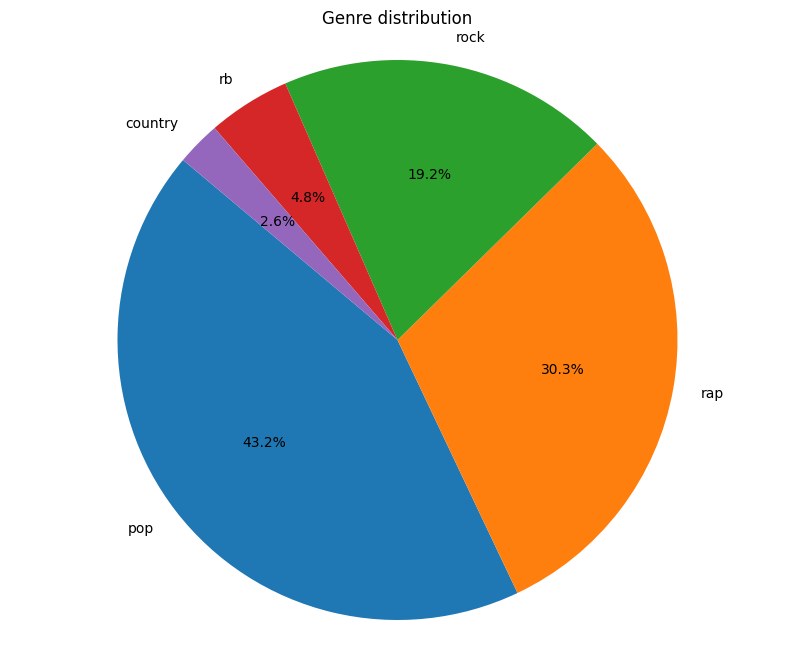

In [ ]:
import matplotlib.pyplot as plt

# Get the count of each tag
tag_counts = df['tag'].value_counts()

# Create a pie chart
plt.figure(figsize=(10,8))
plt.pie(tag_counts, labels = tag_counts.index, autopct='%1.1f%%', startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.title('Genre distribution')
plt.show()

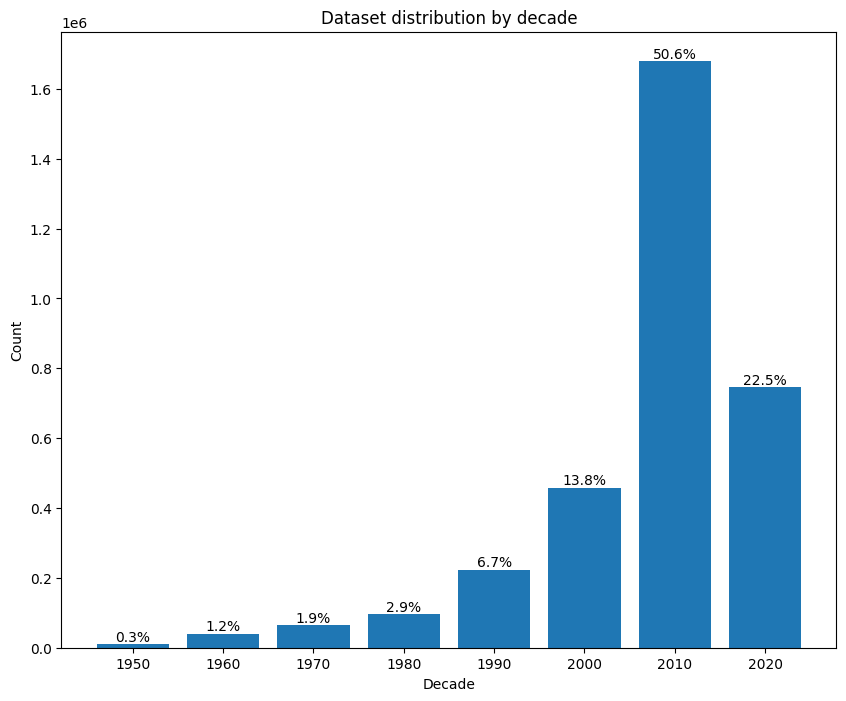

In [ ]:
import matplotlib.pyplot as plt

# Convert years to decades
df['decade'] = (df['year'] // 10) * 10

# Count the number of occurrences of each decade
decade_counts = df['decade'].value_counts()

# Remove the decades 2050 and 2100 if they exist in decade_counts
decade_counts = decade_counts.drop([2050, 2100], errors='ignore').sort_index()

# Calculate the percentage contribution of each decade to the total count
percentage = (decade_counts / decade_counts.sum()) * 100

# Create a bar chart
plt.figure(figsize=(10, 8))
bars = plt.bar(decade_counts.index.astype(str), decade_counts.values)
plt.xlabel('Decade')
plt.ylabel('Count')
plt.title('Dataset distribution by decade')

# Add the percentage above each bar
for bar, pct in zip(bars, percentage):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{pct:.1f}%', ha='center', va='bottom')

plt.show()

In [ ]:
# !pip install better_profanity

In [ ]:
# from better_profanity import profanity

# # load Google's list of profanity words
# with open('/content/british-swear-words-list_text-file.txt', 'r') as file:
#     google_profanity_words = [line.strip() for line in file.readlines()]

# # Add Google's list to the better_profanity library
# profanity.add_censor_words(google_profanity_words)

# def detect_profanity(text):
#     if profanity.contains_profanity(text):
#         return True
#     else:
#         return False

In [ ]:
import numpy as np

In [ ]:
import tqdm

In [ ]:
!pip install alt-profanity-check

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 40.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for alt-profanity-check: filename=alt_profanity_check-1.2.2-py3-none-any.whl size=1866162 sha256=b4398f29bcb40a1178356df1df85caea9b21e92c9d9b7900eebdabd54a4c4cac
  Stored in directory: /root/.cache/pip/wheels/5b/98/77/c2903d8f2862ecf6ac3f51007e82f12d456f1ac7f6a147e7ab
Successfully built alt-profanity-check


In [ ]:
import numpy as np
import pandas as pd
from profanity_check import predict
from tqdm import tqdm

# load custom list of profanity words
with open('/content/list.txt', 'r') as file:
    custom_profanity_words = [line.strip() for line in file.readlines()]

def contains_profanity(texts):
    profanity_check_predictions = predict(texts)
    custom_profanity_predictions = [any(word in text for word in custom_profanity_words) for text in texts]
    return [pcp or cpp for pcp, cpp in zip(profanity_check_predictions, custom_profanity_predictions)]

chunksize = 10000  # adjust this value based on your available memory and the size of your dataframe

chunks = []  # list to hold the chunk dataframes

# Convert the DataFrame to chunks
num_chunks = len(df) // chunksize + 1
df_chunks = np.array_split(df, num_chunks)

# Process each chunk
for chunk in tqdm(df_chunks):
    chunk['lyrics'] = chunk['lyrics'].fillna('')  # fill NaN values with empty strings
    chunk['Contains Profanity'] = contains_profanity(chunk['lyrics'].tolist())
    chunks.append(chunk)

# Concatenate all chunks
df = pd.concat(chunks, axis=0)

100%|██████████| 332/332 [29:53<00:00,  5.40s/it]


In [ ]:
del df_chunks

In [ ]:
import gc


# Run the garbage collector
gc.collect()

3273

In [ ]:
df

,title,tag,artist,year,lyrics,decade,Contains Profanity
0,Killa Cam,rap,Cam'ron,2004,".Killa Cam, Killa Cam, Cam.Killa Cam, Killa Ca...",2000,True
1,Can I Live,rap,JAY-Z,1996,".Yeah, hah, yeah, Roc-A-Fella.We invite you to...",1990,1
2,Forgive Me Father,rap,Fabolous,2003,Maybe cause Im eatin.And these bastards fiend ...,2000,1
3,Down and Out,rap,Cam'ron,2004,".Ugh, Killa!.Baby!.Kanye, this that 1970s Hero...",2000,1
4,Fly In,rap,Lil Wayne,2005,.So they ask me.Young boy.What you gon do the ...,2000,1
...,...,...,...,...,...,...,...
3318325,Everything Is Alright Now,pop,Chuck Bernard,2013,"Everything is alright now.Oh yes, baby.Everyth...",2010,False
3318326,White Lies,pop,ElementD,2019,.Half truth and half you.Didnt we say were thr...,2010,1
3318327,Ocean,pop,Effemar,2022,.Dance for me now.Keeping yourself moving.Your...,2020,False
3318328,Raise Our Hands,pop,"Culture Code, Pag & Mylo",2016,.Here our purpose feels alive.We are more than...,2010,True


In [ ]:
# Assuming 'df' is the DataFrame containing the 'Contains Profanity' column
noprofane = df[df['Contains Profanity'] == 0]

In [ ]:
noprofane

,title,tag,artist,year,lyrics,decade,Contains Profanity
205,A Thugz Prayer,rap,Bizzy Bone,2007,".I am not John, I am not Jesus.And I could nev...",2000,False
587,Find Your Love,pop,Drake,2010,".Im more than just an option (Hey, hey, hey).R...",2010,False
680,People Going Down,rap,Hi-Tek,2006,".Time to change your way, people act cra-zay.G...",2000,False
696,Cee-Lo,rap,Goodie Mob,1995,"I knew, I kinda pieced together what they was ...",1990,False
1047,Serenity Prayer,rap,Goodie Mob,1995,"God, grant me the serenity to accept the thing...",1990,False
...,...,...,...,...,...,...,...
3318279,When Youre Sleeping,rock,Kowabunga! Kid,2016,When I wake up the sun hits my eyes.Another da...,2010,False
3318307,Afterlife,pop,Anushka Skylar Sanyal,2022,Said shes sweet enough to take your breath awa...,2020,False
3318321,Bury You,rock,Mirror Lake (USA),2021,Im dying from within.Ive run out of time.The d...,2020,False
3318325,Everything Is Alright Now,pop,Chuck Bernard,2013,"Everything is alright now.Oh yes, baby.Everyth...",2010,False


In [ ]:
del df

In [ ]:
import gc


# Run the garbage collector
gc.collect()

0

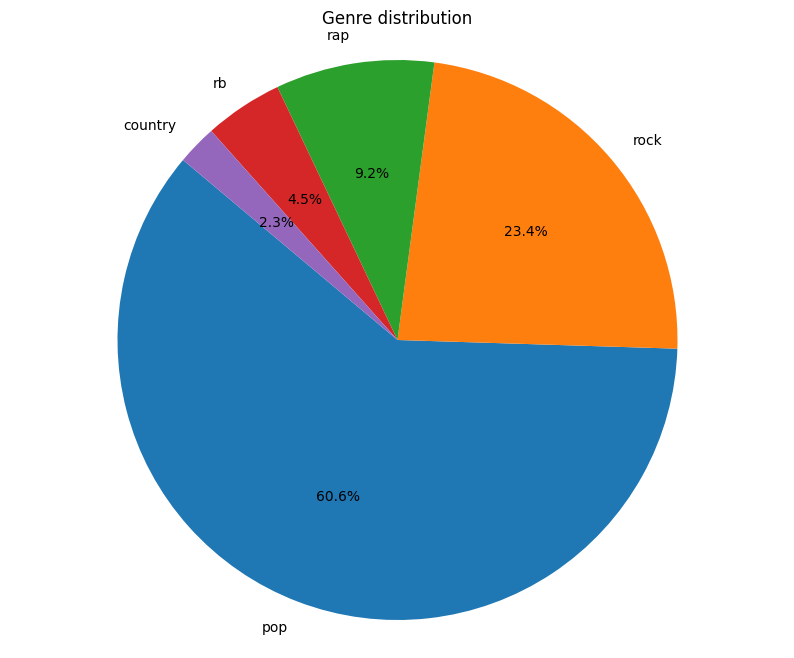

In [ ]:
import matplotlib.pyplot as plt

# Get the count of each tag
tag_counts = noprofane['tag'].value_counts()

# Create a pie chart
plt.figure(figsize=(10,8))
plt.pie(tag_counts, labels = tag_counts.index, autopct='%1.1f%%', startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.title('Genre distribution')
plt.show()

<ipython-input-19-89d865343fa0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noprofane['decade'] = (noprofane['year'] // 10) * 10


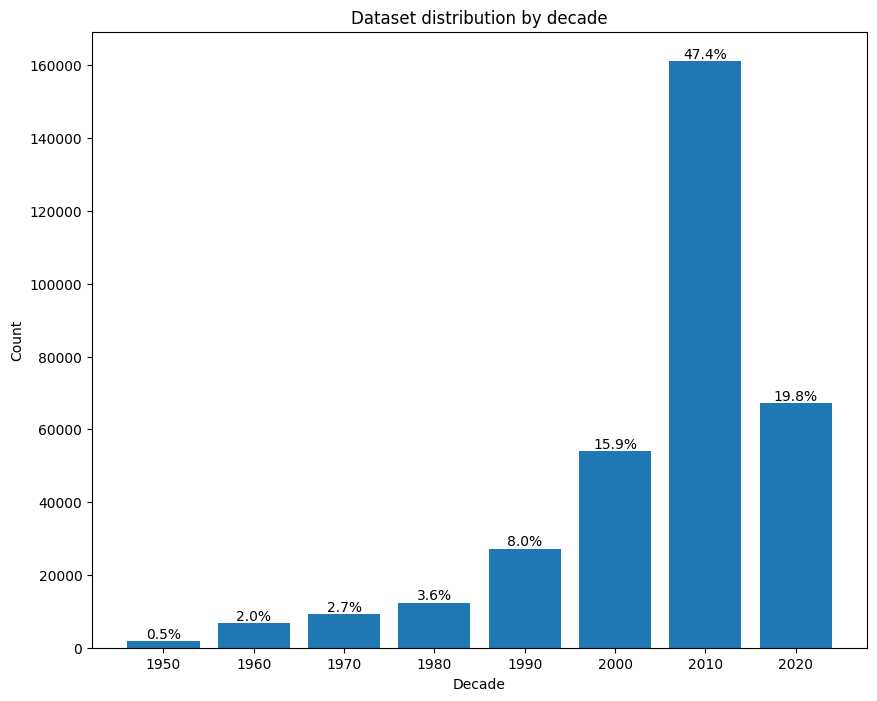

In [ ]:
import matplotlib.pyplot as plt

# Convert years to decades
noprofane['decade'] = (noprofane['year'] // 10) * 10

# Count the number of occurrences of each decade
decade_counts = noprofane['decade'].value_counts()

# Remove the decades 2050 and 2100 if they exist in decade_counts
decade_counts = decade_counts.drop([2050, 2100], errors='ignore').sort_index()

# Calculate the percentage contribution of each decade to the total count
percentage = (decade_counts / decade_counts.sum()) * 100

# Create a bar chart
plt.figure(figsize=(10, 8))
bars = plt.bar(decade_counts.index.astype(str), decade_counts.values)
plt.xlabel('Decade')
plt.ylabel('Count')
plt.title('Dataset distribution by decade')

# Add the percentage above each bar
for bar, pct in zip(bars, percentage):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{pct:.1f}%', ha='center', va='bottom')

plt.show()

In [ ]:
# noprofane.to_csv('/content/noprofane.csv', index=False)

In [ ]:
# import pandas as pd
# # noprofane = pd.read_csv('/content/noprofane.csv')

In [ ]:
noprofane

,title,tag,artist,year,lyrics,decade,Contains Profanity
205,A Thugz Prayer,rap,Bizzy Bone,2007,".I am not John, I am not Jesus.And I could nev...",2000,False
587,Find Your Love,pop,Drake,2010,".Im more than just an option (Hey, hey, hey).R...",2010,False
680,People Going Down,rap,Hi-Tek,2006,".Time to change your way, people act cra-zay.G...",2000,False
696,Cee-Lo,rap,Goodie Mob,1995,"I knew, I kinda pieced together what they was ...",1990,False
1047,Serenity Prayer,rap,Goodie Mob,1995,"God, grant me the serenity to accept the thing...",1990,False
...,...,...,...,...,...,...,...
3318279,When Youre Sleeping,rock,Kowabunga! Kid,2016,When I wake up the sun hits my eyes.Another da...,2010,False
3318307,Afterlife,pop,Anushka Skylar Sanyal,2022,Said shes sweet enough to take your breath awa...,2020,False
3318321,Bury You,rock,Mirror Lake (USA),2021,Im dying from within.Ive run out of time.The d...,2020,False
3318325,Everything Is Alright Now,pop,Chuck Bernard,2013,"Everything is alright now.Oh yes, baby.Everyth...",2010,False


In [ ]:
noprofane.sort_values(by=['artist', 'year', 'title', 'lyrics'], inplace=True)

<ipython-input-21-c278280436c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noprofane.sort_values(by=['artist', 'year', 'title', 'lyrics'], inplace=True)


In [ ]:
# import pandas as pd
# from google.colab import drive
# import zipfile

# # Mount Google Drive
# drive.mount('/content/drive')

# # Define the path to the zip file
# zip_file_path = '/content/drive/MyDrive/noprofane.zip'

# # Create a ZipFile object
# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     # Extract the zip file
#     zip_ref.extractall('/content')

# # Assuming that the csv file inside the zip file is named 'noprofane.csv'
# noprofane = pd.read_csv('/content/noprofane.csv')

Mounted at /content/drive


In [ ]:
# # Assuming that the csv file inside the zip file is named 'noprofane.csv'
# noprofane = pd.read_csv('/content/noprofane.csv')

In [ ]:
# Convert 'title' to string and remove rows that have non-Latin words
noprofane = noprofane[noprofane['title'].astype(str).apply(lambda x: x.isascii())]

In [ ]:
noprofane

,title,tag,artist,year,lyrics,decade,Contains Profanity
3165596,Listen to my heart,pop,"(Nico Yazawa, Rin Hoshizora & Hanayo Koi...",2012,. Happy tune. Listen to my heart!!. Happy tune...,2010,False
3164245,START:DASH,pop,"(Honoka Kosaka, Kotori Minami, Umi Sonoda)",2013,".I say.Hey, hey, hey, START:DASH!!.Hey, hey, h...",2010,False
2265773,The Night Boulevard,pop,(Natasha Koroleva & Igor Nikolaev),1992,Come now to the ring.Where the witches play.Se...,1990,False
3308541,Shining Future,pop,"(Nozomi, Chika & Tsumugi)",2020,. Lets go!. Every day. My Heart.Every day.,2020,False
3308450,Connecting Happy,pop,"(Pecorine, Kokkoro & Karyl)",2018,.Yay!. Everyday!.Connecting Happy!! (Yay!). .Y...,2010,False
...,...,...,...,...,...,...,...
1273001,Sittin Pretty,rb,|Fritzwa|,2016,Squinting at the writing on the wall.Hoping th...,2010,False
2333819,Spirit on My Side,pop,|Spirit Entertainment,2020,"., .With the Spirit on My Side., .With the S...",2020,False
2944958,Feelin So Fine,rb,avamlmAv,2021,.Yeah (when youre feelin so fine).Yeah (when y...,2020,False
2943779,Sunrise,rb,avamlmAv,2021,.Over your head.Sunrise (you got a good self c...,2020,False


In [ ]:
!pip install datasketch fuzzywuzzy python-Levenshtein tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.1/174.1 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 82.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from datasketch import MinHash, MinHashLSH
from fuzzywuzzy import fuzz
from tqdm import tqdm

# Assuming that you have loaded your DataFrame into the variable `noprofane`

# Initialize MinHashLSH with a threshold that determines the cutoff for similarity
lsh = MinHashLSH(threshold=0.85, num_perm=128)

# Compute MinHash values for each lyric and add them to lsh
minhashes = {}
for idx, row in tqdm(noprofane.iterrows(), total=noprofane.shape[0], desc="Computing MinHash"):
    m = MinHash(num_perm=128)
    for word in row['lyrics'].split(' '):
        m.update(word.encode('utf8'))
    lsh.insert(idx, m)
    minhashes[idx] = m

# Find potential matches and use fuzzy matching to confirm
to_drop = []
for idx in tqdm(minhashes.keys(), desc="Checking for duplicates"):
    result = lsh.query(minhashes[idx])
    result.remove(idx)  # remove self-match
    for match in result:
        if fuzz.ratio(noprofane.loc[idx, 'lyrics'], noprofane.loc[match, 'lyrics']) >= 85:
            to_drop.append(match)

# Drop duplicates
noprofane = noprofane.drop(to_drop)

Checking for duplicates: 100%|██████████| 339976/339976 [01:10<00:00, 4827.97it/s]


In [ ]:
noprofane

,title,tag,artist,year,lyrics,decade,Contains Profanity
3165596,Listen to my heart,pop,"(Nico Yazawa, Rin Hoshizora & Hanayo Koi...",2012,. Happy tune. Listen to my heart!!. Happy tune...,2010,False
2265773,The Night Boulevard,pop,(Natasha Koroleva & Igor Nikolaev),1992,Come now to the ring.Where the witches play.Se...,1990,False
3308541,Shining Future,pop,"(Nozomi, Chika & Tsumugi)",2020,. Lets go!. Every day. My Heart.Every day.,2020,False
3308450,Connecting Happy,pop,"(Pecorine, Kokkoro & Karyl)",2018,.Yay!. Everyday!.Connecting Happy!! (Yay!). .Y...,2010,False
2241359,A Time for Us,pop,(Tatyana Mezhentseva & Denberel Oorzhak),2019,". . - . , . . . , . .Were fr...",2010,False
...,...,...,...,...,...,...,...
1273001,Sittin Pretty,rb,|Fritzwa|,2016,Squinting at the writing on the wall.Hoping th...,2010,False
2333819,Spirit on My Side,pop,|Spirit Entertainment,2020,"., .With the Spirit on My Side., .With the S...",2020,False
2944958,Feelin So Fine,rb,avamlmAv,2021,.Yeah (when youre feelin so fine).Yeah (when y...,2020,False
2943779,Sunrise,rb,avamlmAv,2021,.Over your head.Sunrise (you got a good self c...,2020,False


In [ ]:
noprofane.to_csv('/content/noprofane.csv')

# Compress the csv file into a zip file
import zipfile

with zipfile.ZipFile('noprofane.zip', 'w') as zip_ref:
    zip_ref.write('noprofane.csv')

from google.colab import drive
drive.mount('/content/drive')
!cp noprofane.zip /content/drive/MyDrive/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import spacy
import pandas as pd
from tqdm import tqdm

# Load the English model of spaCy
nlp = spacy.load('en_core_web_sm')

# Define a function to apply to each row in the DataFrame
def to_sentences(text):
    # Apply the loaded spaCy model to the text
    doc = nlp(text)

    # Get the sentences
    sentences = [sent.text for sent in doc.sents]
    return sentences

# Apply the function to each row in the DataFrame with a progress bar
tqdm.pandas()
noprofane['lyrics_sentences'] = noprofane['lyrics'].progress_apply(to_sentences)

100%|██████████| 305408/305408 [2:36:26<00:00, 32.54it/s]


In [ ]:
noprofane

,title,tag,artist,year,lyrics,decade,Contains Profanity,lyrics_sentences
3165596,Listen to my heart,pop,"(Nico Yazawa, Rin Hoshizora & Hanayo Koi...",2012,. Happy tune. Listen to my heart!!. Happy tune...,2010,False,"[., Happy tune., Listen to my heart!!., Happy ..."
2265773,The Night Boulevard,pop,(Natasha Koroleva & Igor Nikolaev),1992,Come now to the ring.Where the witches play.Se...,1990,False,"[Come now to the ring., Where the witches play..."
3308541,Shining Future,pop,"(Nozomi, Chika & Tsumugi)",2020,. Lets go!. Every day. My Heart.Every day.,2020,False,"[., Lets go!., Every day., My Heart., Every day.]"
3308450,Connecting Happy,pop,"(Pecorine, Kokkoro & Karyl)",2018,.Yay!. Everyday!.Connecting Happy!! (Yay!). .Y...,2010,False,"[.Yay!., Everyday!.Connecting Happy!!, (Yay!)...."
2241359,A Time for Us,pop,(Tatyana Mezhentseva & Denberel Oorzhak),2019,". . - . , . . . , . .Were fr...",2010,False,"[. ., - . , , . . . , , . , ..."
...,...,...,...,...,...,...,...,...
1273001,Sittin Pretty,rb,|Fritzwa|,2016,Squinting at the writing on the wall.Hoping th...,2010,False,"[Squinting at the writing on the wall., Hoping..."
2333819,Spirit on My Side,pop,|Spirit Entertainment,2020,"., .With the Spirit on My Side., .With the S...",2020,False,"[., , .With the Spirit on My Side., , .With ..."
2944958,Feelin So Fine,rb,avamlmAv,2021,.Yeah (when youre feelin so fine).Yeah (when y...,2020,False,"[.Yeah (when youre feelin, so, fine).Yeah, (wh..."
2943779,Sunrise,rb,avamlmAv,2021,.Over your head.Sunrise (you got a good self c...,2020,False,"[.Over your head., Sunrise (you got a good sel..."


In [ ]:
import ast


# Define a function to convert string representation of a list into a list and remove '.'
def remove_period(sentences_str):
    sentences = ast.literal_eval(sentences_str)  # Convert string to list
    return [sentence for sentence in sentences if sentence != '.']

# Apply this function to every item in the 'lyrics_sentences' column
noprofane['lyrics_sentences_1'] = noprofane['lyrics_sentences'].apply(remove_period)

In [ ]:
def remove_period(lst):
    return [item for item in lst if item != '.']
import pandas as pd

# Assuming df is your DataFrame and 'my_column' is the column you want to transform
noprofane['lyrics_sentences'] = noprofane['lyrics_sentences'].apply(remove_period)

In [ ]:
noprofane

,title,tag,artist,year,lyrics,decade,Contains Profanity,lyrics_sentences,lyrics_sentences_1
3165596,Listen to my heart,pop,"(Nico Yazawa, Rin Hoshizora & Hanayo Koi...",2012,. Happy tune. Listen to my heart!!. Happy tune...,2010,False,"[Happy tune., Listen to my heart!!., Happy tun...","[Happy tune., Listen to my heart!!., Happy tun..."
2265773,The Night Boulevard,pop,(Natasha Koroleva & Igor Nikolaev),1992,Come now to the ring.Where the witches play.Se...,1990,False,"[Come now to the ring., Where the witches play...","[Come now to the ring., Where the witches play..."
3308541,Shining Future,pop,"(Nozomi, Chika & Tsumugi)",2020,. Lets go!. Every day. My Heart.Every day.,2020,False,"[Lets go!., Every day., My Heart., Every day.]","[Lets go!., Every day., My Heart., Every day.]"
3308450,Connecting Happy,pop,"(Pecorine, Kokkoro & Karyl)",2018,.Yay!. Everyday!.Connecting Happy!! (Yay!). .Y...,2010,False,"[.Yay!., Everyday!.Connecting Happy!!, (Yay!)....","[.Yay!., Everyday!.Connecting Happy!!, (Yay!)...."
2241359,A Time for Us,pop,(Tatyana Mezhentseva & Denberel Oorzhak),2019,". . - . , . . . , . .Were fr...",2010,False,"[. ., - . , , . . . , , . , ...","[. ., - . , , . . . , , . , ..."
...,...,...,...,...,...,...,...,...,...
1273001,Sittin Pretty,rb,|Fritzwa|,2016,Squinting at the writing on the wall.Hoping th...,2010,False,"[Squinting at the writing on the wall., Hoping...","[Squinting at the writing on the wall., Hoping..."
2333819,Spirit on My Side,pop,|Spirit Entertainment,2020,"., .With the Spirit on My Side., .With the S...",2020,False,"[., , .With the Spirit on My Side., , .With ...","[., , .With the Spirit on My Side., , .With ..."
2944958,Feelin So Fine,rb,avamlmAv,2021,.Yeah (when youre feelin so fine).Yeah (when y...,2020,False,"[.Yeah (when youre feelin, so, fine).Yeah, (wh...","[.Yeah (when youre feelin, so, fine).Yeah, (wh..."
2943779,Sunrise,rb,avamlmAv,2021,.Over your head.Sunrise (you got a good self c...,2020,False,"[.Over your head., Sunrise (you got a good sel...","[.Over your head., Sunrise (you got a good sel..."


In [ ]:
import pandas as pd
from tqdm import tqdm

# Load the search words from the file, assuming each word is on a new line
with open('/content/drive/MyDrive/search_words.txt', 'r') as f:
    search_words = [word.strip() for word in f.readlines()]

# Function to find smell words in sentences
def find_smell_words(sentences):
    found_words = []
    found_sentences = []
    for sentence in sentences:
        for word in search_words:
            if word in sentence:
                found_words.append(word)
                found_sentences.append(sentence)
    return found_words, found_sentences

# Function to apply to each row in the DataFrame
def process_row(row):
    sentences = row['lyrics_sentences']
    found_words, found_sentences = find_smell_words(sentences)
    row['contains_word'] = 1 if found_words else 0
    row['found_words'] = found_words
    row['found_sentences'] = found_sentences
    return row

# Apply the function to each row in the DataFrame with a progress bar
tqdm.pandas()
noprofane = noprofane.progress_apply(process_row, axis=1)

100%|██████████| 305408/305408 [09:50<00:00, 517.31it/s]


In [ ]:
noprofane.to_csv('/content/noprofane.csv')

# Compress the csv file into a zip file
import zipfile

with zipfile.ZipFile('noprofane.zip', 'w') as zip_ref:
    zip_ref.write('noprofane.csv')

from google.colab import drive
drive.mount('/content/drive')
!cp noprofane.zip /content/drive/MyDrive/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import ast


# Define a function to convert string representation of a list into a list and remove '.'
def remove_period(sentences_str):
    sentences = ast.literal_eval(sentences_str)  # Convert string to list
    return [sentence for sentence in sentences if sentence != '.']

# Apply this function to every item in the 'lyrics_sentences' column
noprofane['lyrics_sentences'] = noprofane['lyrics_sentences'].apply(remove_period)

KeyError: ignored

In [ ]:
# from google.colab import drive
# import pandas as pd
# import zipfile
# import os

# # Mount Google Drive
# drive.mount('/content/drive')

# # The path to the zip file on your Google Drive
# zip_file_path = '/content/drive/MyDrive/noprofane.zip'

# # Unzip the file
# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     zip_ref.extractall('/content/')

# # Now that we've extracted the CSV, let's load it into a DataFrame
# csv_file_path = '/content/noprofane.csv'
# noprofane = pd.read_csv(csv_file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# noprofane.to_csv('/content/noprofane.csv')

# # Compress the csv file into a zip file
# import zipfile

# with zipfile.ZipFile('noprofane.zip', 'w') as zip_ref:
#     zip_ref.write('noprofane.csv')

# from google.colab import drive
# drive.mount('/content/drive')
# !cp noprofane.zip /content/drive/MyDrive/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# # Load the search words from the file, assuming each word is on a new line
# with open('/content/drive/MyDrive/search_words.txt', 'r') as f:
#     search_words = [word.strip() for word in f.readlines()]

# # Convert list of search words to set for faster lookups
# search_words = set(search_words)

# # Function to find smell words in sentences
# def find_smell_words(sentences):
#     found_words = []
#     found_sentences = []
#     for sentence in sentences:
#         tokenized_sentence = sentence.split()  # split the sentence into tokens
#         for word in search_words:
#             if word in tokenized_sentence:  # check if the word is in the list of tokens
#                 found_words.append(word)
#                 found_sentences.append(sentence)
#     return found_words, found_sentences

# # Function to apply to each row in the DataFrame
# def process_row(row):
#     sentences = row['lyrics_sentences']
#     found_words, found_sentences = find_smell_words(sentences)
#     row['contains_word'] = 1 if found_words else 0
#     row['found_words'] = found_words
#     row['found_sentences'] = found_sentences
#     return row

# # Apply the function to each row in the DataFrame with a progress bar
# tqdm.pandas()
# noprofane = noprofane.progress_apply(process_row, axis=1)

In [ ]:
# # Load the search words from the file, assuming each word is on a new line
# with open('/content/drive/MyDrive/search_words.txt', 'r') as f:
#     search_words = [word.strip() for word in f.readlines()]

# # Convert list of search words to set for faster lookups
# search_words = set(search_words)

# # Function to find smell words in sentences
# def find_smell_words(sentences):
#     found_words = []
#     found_sentences = []
#     for sentence in sentences:
#         tokenized_sentence = sentence.split()  # split the sentence into tokens
#         for token in tokenized_sentence:
#             if token in search_words:  # check if the token is in the list of search words
#                 found_words.append(token)
#                 found_sentences.append(sentence)
#     return found_words, found_sentences

# # Function to apply to each row in the DataFrame
# def process_row(row):
#     sentences = row['lyrics_sentences']
#     found_words, found_sentences = find_smell_words(sentences)
#     row['contains_word'] = 1 if found_words else 0
#     row['found_words'] = found_words
#     row['found_sentences'] = found_sentences
#     return row

# # Apply the function to each row in the DataFrame with a progress bar
# from tqdm import tqdm
# tqdm.pandas()
# noprofane = noprofane.progress_apply(process_row, axis=1)


100%|██████████| 305408/305408 [00:42<00:00, 7239.79it/s]


In [ ]:
import string

# Load the search words from the file, assuming each word is on a new line
with open('/content/drive/MyDrive/search_words.txt', 'r') as f:
    search_words = [word.strip().lower() for word in f.readlines()]

# Convert list of search words to set for faster lookups
search_words = set(search_words)

# Function to find smell words in sentences
def find_smell_words(sentences):
    found_words = []
    found_sentences = []
    for sentence in sentences:
        # remove punctuation and convert to lower case
        sentence = sentence.translate(str.maketrans('', '', string.punctuation)).lower()
        tokenized_sentence = sentence.split()  # split the sentence into tokens
        for token in tokenized_sentence:
            if token in search_words:  # check if the token exactly matches a word in the list of search words
                found_words.append(token)
                found_sentences.append(sentence)
    return found_words, found_sentences

# Function to apply to each row in the DataFrame
def process_row(row):
    sentences = row['lyrics_sentences'].split(", ") # split the string into list of sentences
    found_words, found_sentences = find_smell_words(sentences)
    row['contains_word'] = 1 if found_words else 0
    row['found_words'] = found_words
    row['found_sentences'] = found_sentences
    return row


# Apply the function to each row in the DataFrame with a progress bar
from tqdm import tqdm
tqdm.pandas()
noprofane = noprofane.progress_apply(process_row, axis=1)

100%|██████████| 305408/305408 [01:13<00:00, 4135.35it/s]


In [ ]:
noprofane

,Unnamed: 0,title,tag,artist,year,lyrics,decade,Contains Profanity,lyrics_sentences,lyrics_sentences_1,contains_word,found_words,found_sentences
0,3165596,Listen to my heart,pop,"(Nico Yazawa, Rin Hoshizora & Hanayo Koi...",2012,. Happy tune. Listen to my heart!!. Happy tune...,2010,False,"['Happy tune.', 'Listen to my heart!!.', 'Happ...","['Happy tune.', 'Listen to my heart!!.', 'Happ...",0,[],[]
1,2265773,The Night Boulevard,pop,(Natasha Koroleva & Igor Nikolaev),1992,Come now to the ring.Where the witches play.Se...,1990,False,"['Come now to the ring.', 'Where the witches p...","['Come now to the ring.', 'Where the witches p...",0,[],[]
2,3308541,Shining Future,pop,"(Nozomi, Chika & Tsumugi)",2020,. Lets go!. Every day. My Heart.Every day.,2020,False,"['Lets go!.', 'Every day.', 'My Heart.', 'Ever...","['Lets go!.', 'Every day.', 'My Heart.', 'Ever...",0,[],[]
3,3308450,Connecting Happy,pop,"(Pecorine, Kokkoro & Karyl)",2018,.Yay!. Everyday!.Connecting Happy!! (Yay!). .Y...,2010,False,"['.Yay!.', 'Everyday!.Connecting Happy!!', '(Y...","['.Yay!.', 'Everyday!.Connecting Happy!!', '(Y...",0,[],[]
4,2241359,A Time for Us,pop,(Tatyana Mezhentseva & Denberel Oorzhak),2019,". . - . , . . . , . .Were fr...",2010,False,"['. .', '- . ', ', . . . ', ', ...","['. .', '- . ', ', . . . ', ', ...",0,[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305403,1273001,Sittin Pretty,rb,|Fritzwa|,2016,Squinting at the writing on the wall.Hoping th...,2010,False,"['Squinting at the writing on the wall.', 'Hop...","['Squinting at the writing on the wall.', 'Hop...",0,[],[]
305404,2333819,Spirit on My Side,pop,|Spirit Entertainment,2020,"., .With the Spirit on My Side., .With the S...",2020,False,"['., ', '.With the Spirit on My Side., ', '....","['., ', '.With the Spirit on My Side., ', '....",0,[],[]
305405,2944958,Feelin So Fine,rb,avamlmAv,2021,.Yeah (when youre feelin so fine).Yeah (when y...,2020,False,"['.Yeah (when youre feelin', 'so', 'fine).Yeah...","['.Yeah (when youre feelin', 'so', 'fine).Yeah...",0,[],[]
305406,2943779,Sunrise,rb,avamlmAv,2021,.Over your head.Sunrise (you got a good self c...,2020,False,"['.Over your head.', 'Sunrise (you got a good ...","['.Over your head.', 'Sunrise (you got a good ...",0,[],[]


In [ ]:
noprofane.contains_word.value_counts()

0    301871
1      3537
Name: contains_word, dtype: int64

In [ ]:
# import pandas as pd
# from tqdm import tqdm

# # Load the search words from the file, assuming each word is on a new line
# with open('/content/drive/MyDrive/search_words.txt', 'r') as f:
#     search_words = [word.strip() for word in f.readlines()]

# # Function to find smell words in sentences
# def find_smell_words(sentences):
#     found_words = []
#     found_sentences = []
#     for sentence in sentences:
#         for word in search_words:
#             if word in sentence:
#                 found_words.append(word)
#                 found_sentences.append(sentence)
#     return found_words, found_sentences

# # Function to apply to each row in the DataFrame
# def process_row(row):
#     sentences = row['lyrics_sentences']
#     found_words, found_sentences = find_smell_words(sentences)
#     row['contains_word'] = 1 if found_words else 0
#     row['found_words'] = found_words
#     row['found_sentences'] = found_sentences
#     return row

# # Apply the function to each row in the DataFrame with a progress bar
# tqdm.pandas()
# noprofane = noprofane.progress_apply(process_row, axis=1)

100%|██████████| 308940/308940 [09:14<00:00, 557.11it/s]


In [ ]:
from google.colab import drive
import pandas as pd
import zipfile
import os

# Mount Google Drive
drive.mount('/content/drive')

# The path to the zip file on your Google Drive
zip_file_path = '/content/drive/MyDrive/noprofane.zip'

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')

# Now that we've extracted the CSV, let's load it into a DataFrame
csv_file_path = '/content/noprofane.csv'
noprofane = pd.read_csv(csv_file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
noprofane['contains_word'].value_counts()


0    300851
1      4557
Name: contains_word, dtype: int64

In [ ]:
# Define a function to remove '.' from a list
def remove_period(sentences):
    return [sentence for sentence in sentences if sentence != '.']

# Apply this function to every item in the 'lyrics_sentences' column
noprofane['lyrics_sentences'] = noprofane['lyrics_sentences'].apply(remove_period)

In [ ]:
noprofane.found_sentences.value_counts()
noprofane.found_words.value_counts()

[]                                                           301871
[smell]                                                        1005
[scent]                                                         389
[perfume]                                                       218
[smell, smell]                                                  163
                                                              ...  
[smell, scent, smell]                                             1
[smell, reeks]                                                    1
[smell, smell, stinks]                                            1
[smelt, fragrance]                                                1
[ripe, ripe, ripe, ripe, perfume, ripe, ripe, ripe, ripe]         1
Name: found_words, Length: 334, dtype: int64

In [ ]:
noprofane

,Unnamed: 0,title,tag,artist,year,lyrics,decade,Contains Profanity,lyrics_sentences,lyrics_sentences_1,contains_word,found_words,found_sentences
0,3165596,Listen to my heart,pop,"(Nico Yazawa, Rin Hoshizora & Hanayo Koi...",2012,. Happy tune. Listen to my heart!!. Happy tune...,2010,False,"['Happy tune.', 'Listen to my heart!!.', 'Happ...","['Happy tune.', 'Listen to my heart!!.', 'Happ...",0,[],[]
1,2265773,The Night Boulevard,pop,(Natasha Koroleva & Igor Nikolaev),1992,Come now to the ring.Where the witches play.Se...,1990,False,"['Come now to the ring.', 'Where the witches p...","['Come now to the ring.', 'Where the witches p...",0,[],[]
2,3308541,Shining Future,pop,"(Nozomi, Chika & Tsumugi)",2020,. Lets go!. Every day. My Heart.Every day.,2020,False,"['Lets go!.', 'Every day.', 'My Heart.', 'Ever...","['Lets go!.', 'Every day.', 'My Heart.', 'Ever...",0,[],[]
3,3308450,Connecting Happy,pop,"(Pecorine, Kokkoro & Karyl)",2018,.Yay!. Everyday!.Connecting Happy!! (Yay!). .Y...,2010,False,"['.Yay!.', 'Everyday!.Connecting Happy!!', '(Y...","['.Yay!.', 'Everyday!.Connecting Happy!!', '(Y...",0,[],[]
4,2241359,A Time for Us,pop,(Tatyana Mezhentseva & Denberel Oorzhak),2019,". . - . , . . . , . .Were fr...",2010,False,"['. .', '- . ', ', . . . ', ', ...","['. .', '- . ', ', . . . ', ', ...",0,[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305403,1273001,Sittin Pretty,rb,|Fritzwa|,2016,Squinting at the writing on the wall.Hoping th...,2010,False,"['Squinting at the writing on the wall.', 'Hop...","['Squinting at the writing on the wall.', 'Hop...",0,[],[]
305404,2333819,Spirit on My Side,pop,|Spirit Entertainment,2020,"., .With the Spirit on My Side., .With the S...",2020,False,"['., ', '.With the Spirit on My Side., ', '....","['., ', '.With the Spirit on My Side., ', '....",0,[],[]
305405,2944958,Feelin So Fine,rb,avamlmAv,2021,.Yeah (when youre feelin so fine).Yeah (when y...,2020,False,"['.Yeah (when youre feelin', 'so', 'fine).Yeah...","['.Yeah (when youre feelin', 'so', 'fine).Yeah...",0,[],[]
305406,2943779,Sunrise,rb,avamlmAv,2021,.Over your head.Sunrise (you got a good self c...,2020,False,"['.Over your head.', 'Sunrise (you got a good ...","['.Over your head.', 'Sunrise (you got a good ...",0,[],[]


In [ ]:
noprofane.contains_word.value_counts()

0    301871
1      3537
Name: contains_word, dtype: int64

In [ ]:
smell_df = noprofane[noprofane['contains_word'] == 1]

In [ ]:
smell_df

,Unnamed: 0,title,tag,artist,year,lyrics,decade,Contains Profanity,lyrics_sentences,lyrics_sentences_1,contains_word,found_words,found_sentences
211,1651536,Sorry Tiger,rock,(Mumiy Troll),2012,I am on a scent.But am I dinner.The biggest pr...,2010,False,"['I am on a scent.', 'But am I dinner.', 'The ...","['I am on a scent.', 'But am I dinner.', 'The ...",1,[scent],[i am on a scent]
287,3232787,Superman,pop,(Viktor Apostolovski),2022,".I can walk, I can talk.I can move, I can groo...",2020,False,"['.I can walk, I can talk.', 'I can move, I ca...","['.I can walk, I can talk.', 'I can move, I ca...",1,"[pong, pong, pong]","[i can pong, pong, pong]"
1564,2091483,Summer Time,pop,(Kumi Koda),2019,In the ring line.On the route track.In the kit...,2010,False,"['In the ring line.', 'On the route track.', '...","['In the ring line.', 'On the route track.', '...",1,[perfume],[perfume]
1984,2588677,My Life,rb,(Noriko Miyamoto),1978,.Im a flyer of my universe.Oh yeah its open ha...,1970,False,"['.Im', 'a flyer of my universe.', 'Oh yeah', ...","['.Im', 'a flyer of my universe.', 'Oh yeah', ...",1,[smell],[i just feel a fresh smell]
2274,1441558,Fire,rb,(Shota Shimizu),2017,.Im Sorry .Im a Bad Boy NO .Fragrance . Flash...,2010,False,"['.Im', 'Sorry .Im', 'a Bad Boy ', 'NO .Fragr...","['.Im', 'Sorry .Im', 'a Bad Boy ', 'NO .Fragr...",1,[fragrance],[no fragrance ]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
304532,613727,The Experience of Love,pop,ric Serra,1995,I know you dream a lot.Holding on to lies.And ...,1990,False,"['I know you dream a lot.', 'Holding on to lie...","['I know you dream a lot.', 'Holding on to lie...",1,[scent],[love is in your lifeleave the dreams behindbr...
304917,2975850,All Day Breakfast,pop,temp.,2020,.Leave you a bouquet on a bedside table.Block ...,2020,False,"['.Leave you a bouquet on a bedside table.', '...","['.Leave you a bouquet on a bedside table.', '...",1,[bouquet],[leave you a bouquet on a bedside table]
305238,3197284,But OK,rap,week dudus & GUNHEAD,2021,@Genius.com.Born to die .Need a good mind (sni...,2020,False,"['@Genius.com.', 'Born to die .Need', 'a good ...","['@Genius.com.', 'Born to die .Need', 'a good ...",1,"[sniff, sniff, sniff]","[a good mind sniff ya pon, a good mind sniff y..."
305258,2981091,Astray,rock,wideout,2021,"Outside my window, I see a stray crow.It dont ...",2020,False,"['Outside my window, I see a stray crow.', 'It...","['Outside my window, I see a stray crow.', 'It...",1,[reeks],[but my frown reeks of shame]


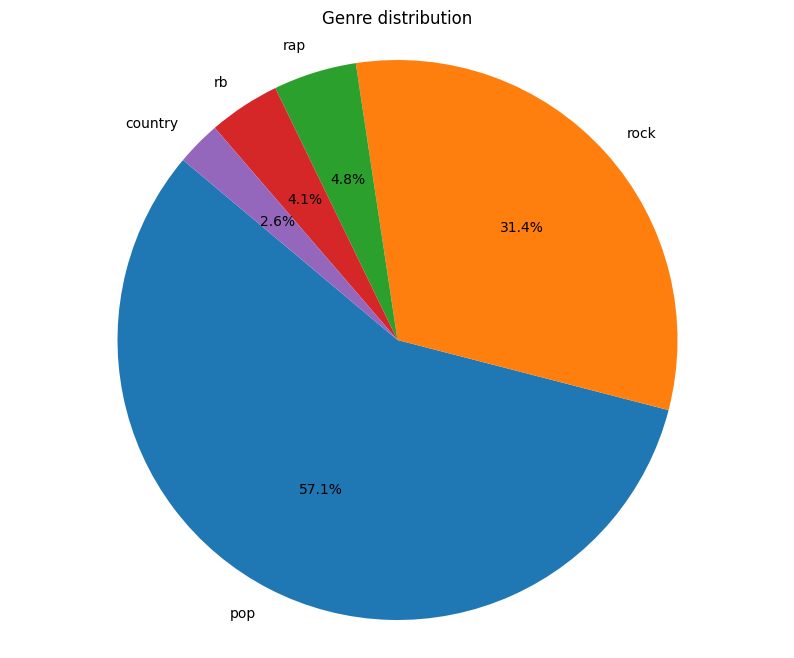

In [ ]:
import matplotlib.pyplot as plt

# Get the count of each tag
tag_counts = smell_df['tag'].value_counts()

# Create a pie chart
plt.figure(figsize=(10,8))
plt.pie(tag_counts, labels = tag_counts.index, autopct='%1.1f%%', startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.title('Genre distribution')
plt.show()

<ipython-input-102-356639a54a0a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smell_df['decade'] = (smell_df['year'] // 10) * 10


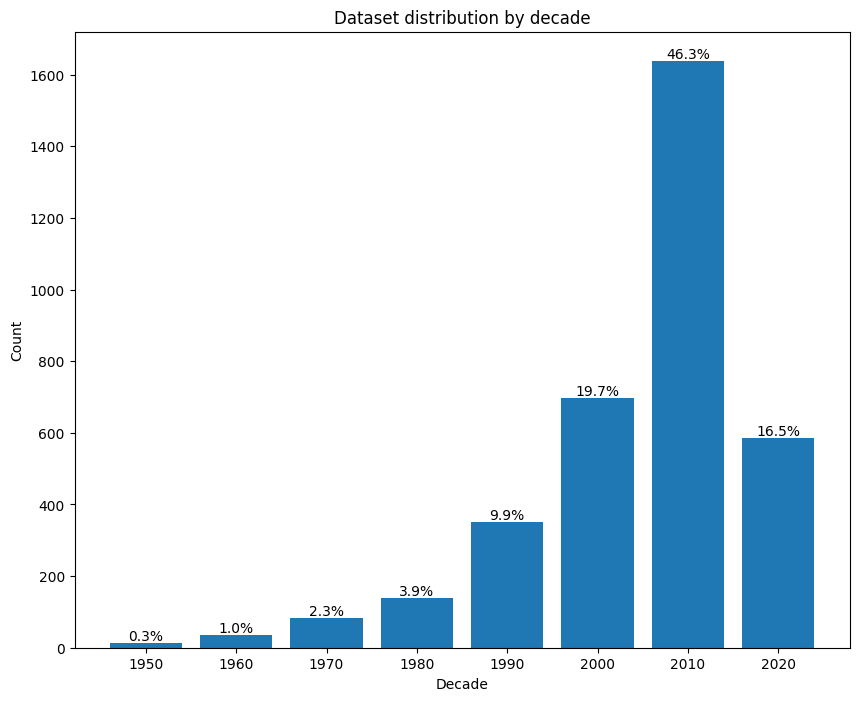

In [ ]:
import matplotlib.pyplot as plt

# Convert years to decades
smell_df['decade'] = (smell_df['year'] // 10) * 10

# Count the number of occurrences of each decade
decade_counts = smell_df['decade'].value_counts()

# Remove the decades 2050 and 2100 if they exist in decade_counts
decade_counts = decade_counts.drop([2050, 2100], errors='ignore').sort_index()

# Calculate the percentage contribution of each decade to the total count
percentage = (decade_counts / decade_counts.sum()) * 100

# Create a bar chart
plt.figure(figsize=(10, 8))
bars = plt.bar(decade_counts.index.astype(str), decade_counts.values)
plt.xlabel('Decade')
plt.ylabel('Count')
plt.title('Dataset distribution by decade')

# Add the percentage above each bar
for bar, pct in zip(bars, percentage):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{pct:.1f}%', ha='center', va='bottom')

plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
smell_df.to_csv('smell_df.csv', index=False)
!cp smell_df.csv /content/drive/MyDrive/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
no_smell_df = noprofane[noprofane['contains_word'] == 0]

In [ ]:
noprofane

,Unnamed: 0,title,tag,artist,year,lyrics,decade,Contains Profanity,lyrics_sentences,lyrics_sentences_1,contains_word,found_words,found_sentences
0,3165596,Listen to my heart,pop,"(Nico Yazawa, Rin Hoshizora & Hanayo Koi...",2012,. Happy tune. Listen to my heart!!. Happy tune...,2010,False,"['Happy tune.', 'Listen to my heart!!.', 'Happ...","['Happy tune.', 'Listen to my heart!!.', 'Happ...",0,[],[]
1,2265773,The Night Boulevard,pop,(Natasha Koroleva & Igor Nikolaev),1992,Come now to the ring.Where the witches play.Se...,1990,False,"['Come now to the ring.', 'Where the witches p...","['Come now to the ring.', 'Where the witches p...",0,[],[]
2,3308541,Shining Future,pop,"(Nozomi, Chika & Tsumugi)",2020,. Lets go!. Every day. My Heart.Every day.,2020,False,"['Lets go!.', 'Every day.', 'My Heart.', 'Ever...","['Lets go!.', 'Every day.', 'My Heart.', 'Ever...",0,[],[]
3,3308450,Connecting Happy,pop,"(Pecorine, Kokkoro & Karyl)",2018,.Yay!. Everyday!.Connecting Happy!! (Yay!). .Y...,2010,False,"['.Yay!.', 'Everyday!.Connecting Happy!!', '(Y...","['.Yay!.', 'Everyday!.Connecting Happy!!', '(Y...",0,[],[]
4,2241359,A Time for Us,pop,(Tatyana Mezhentseva & Denberel Oorzhak),2019,". . - . , . . . , . .Were fr...",2010,False,"['. .', '- . ', ', . . . ', ', ...","['. .', '- . ', ', . . . ', ', ...",0,[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305403,1273001,Sittin Pretty,rb,|Fritzwa|,2016,Squinting at the writing on the wall.Hoping th...,2010,False,"['Squinting at the writing on the wall.', 'Hop...","['Squinting at the writing on the wall.', 'Hop...",0,[],[]
305404,2333819,Spirit on My Side,pop,|Spirit Entertainment,2020,"., .With the Spirit on My Side., .With the S...",2020,False,"['., ', '.With the Spirit on My Side., ', '....","['., ', '.With the Spirit on My Side., ', '....",0,[],[]
305405,2944958,Feelin So Fine,rb,avamlmAv,2021,.Yeah (when youre feelin so fine).Yeah (when y...,2020,False,"['.Yeah (when youre feelin', 'so', 'fine).Yeah...","['.Yeah (when youre feelin', 'so', 'fine).Yeah...",0,[],[]
305406,2943779,Sunrise,rb,avamlmAv,2021,.Over your head.Sunrise (you got a good self c...,2020,False,"['.Over your head.', 'Sunrise (you got a good ...","['.Over your head.', 'Sunrise (you got a good ...",0,[],[]


In [ ]:
no_smell_df

,Unnamed: 0,title,tag,artist,year,lyrics,decade,Contains Profanity,lyrics_sentences,lyrics_sentences_1,contains_word,found_words,found_sentences
0,3165596,Listen to my heart,pop,"(Nico Yazawa, Rin Hoshizora & Hanayo Koi...",2012,. Happy tune. Listen to my heart!!. Happy tune...,2010,False,"['Happy tune.', 'Listen to my heart!!.', 'Happ...","['Happy tune.', 'Listen to my heart!!.', 'Happ...",0,[],[]
1,2265773,The Night Boulevard,pop,(Natasha Koroleva & Igor Nikolaev),1992,Come now to the ring.Where the witches play.Se...,1990,False,"['Come now to the ring.', 'Where the witches p...","['Come now to the ring.', 'Where the witches p...",0,[],[]
2,3308541,Shining Future,pop,"(Nozomi, Chika & Tsumugi)",2020,. Lets go!. Every day. My Heart.Every day.,2020,False,"['Lets go!.', 'Every day.', 'My Heart.', 'Ever...","['Lets go!.', 'Every day.', 'My Heart.', 'Ever...",0,[],[]
3,3308450,Connecting Happy,pop,"(Pecorine, Kokkoro & Karyl)",2018,.Yay!. Everyday!.Connecting Happy!! (Yay!). .Y...,2010,False,"['.Yay!.', 'Everyday!.Connecting Happy!!', '(Y...","['.Yay!.', 'Everyday!.Connecting Happy!!', '(Y...",0,[],[]
4,2241359,A Time for Us,pop,(Tatyana Mezhentseva & Denberel Oorzhak),2019,". . - . , . . . , . .Were fr...",2010,False,"['. .', '- . ', ', . . . ', ', ...","['. .', '- . ', ', . . . ', ', ...",0,[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305403,1273001,Sittin Pretty,rb,|Fritzwa|,2016,Squinting at the writing on the wall.Hoping th...,2010,False,"['Squinting at the writing on the wall.', 'Hop...","['Squinting at the writing on the wall.', 'Hop...",0,[],[]
305404,2333819,Spirit on My Side,pop,|Spirit Entertainment,2020,"., .With the Spirit on My Side., .With the S...",2020,False,"['., ', '.With the Spirit on My Side., ', '....","['., ', '.With the Spirit on My Side., ', '....",0,[],[]
305405,2944958,Feelin So Fine,rb,avamlmAv,2021,.Yeah (when youre feelin so fine).Yeah (when y...,2020,False,"['.Yeah (when youre feelin', 'so', 'fine).Yeah...","['.Yeah (when youre feelin', 'so', 'fine).Yeah...",0,[],[]
305406,2943779,Sunrise,rb,avamlmAv,2021,.Over your head.Sunrise (you got a good self c...,2020,False,"['.Over your head.', 'Sunrise (you got a good ...","['.Over your head.', 'Sunrise (you got a good ...",0,[],[]


In [ ]:
no_smell_df['smell_event'] = 0

<ipython-input-107-81b716054462>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_smell_df['smell_event'] = 0


In [ ]:
smell_df['smell_event'] = 1

<ipython-input-108-714f6f3856ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smell_df['smell_event'] = 1


In [ ]:
df = pd.concat([smell_df, no_smell_df])

In [ ]:
df

,Unnamed: 0,title,tag,artist,year,lyrics,decade,Contains Profanity,lyrics_sentences,lyrics_sentences_1,contains_word,found_words,found_sentences,smell_event
211,1651536,Sorry Tiger,rock,(Mumiy Troll),2012,I am on a scent.But am I dinner.The biggest pr...,2010,False,"['I am on a scent.', 'But am I dinner.', 'The ...","['I am on a scent.', 'But am I dinner.', 'The ...",1,[scent],[i am on a scent],1
287,3232787,Superman,pop,(Viktor Apostolovski),2022,".I can walk, I can talk.I can move, I can groo...",2020,False,"['.I can walk, I can talk.', 'I can move, I ca...","['.I can walk, I can talk.', 'I can move, I ca...",1,"[pong, pong, pong]","[i can pong, pong, pong]",1
1564,2091483,Summer Time,pop,(Kumi Koda),2019,In the ring line.On the route track.In the kit...,2010,False,"['In the ring line.', 'On the route track.', '...","['In the ring line.', 'On the route track.', '...",1,[perfume],[perfume],1
1984,2588677,My Life,rb,(Noriko Miyamoto),1978,.Im a flyer of my universe.Oh yeah its open ha...,1970,False,"['.Im', 'a flyer of my universe.', 'Oh yeah', ...","['.Im', 'a flyer of my universe.', 'Oh yeah', ...",1,[smell],[i just feel a fresh smell],1
2274,1441558,Fire,rb,(Shota Shimizu),2017,.Im Sorry .Im a Bad Boy NO .Fragrance . Flash...,2010,False,"['.Im', 'Sorry .Im', 'a Bad Boy ', 'NO .Fragr...","['.Im', 'Sorry .Im', 'a Bad Boy ', 'NO .Fragr...",1,[fragrance],[no fragrance ],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305403,1273001,Sittin Pretty,rb,|Fritzwa|,2016,Squinting at the writing on the wall.Hoping th...,2010,False,"['Squinting at the writing on the wall.', 'Hop...","['Squinting at the writing on the wall.', 'Hop...",0,[],[],0
305404,2333819,Spirit on My Side,pop,|Spirit Entertainment,2020,"., .With the Spirit on My Side., .With the S...",2020,False,"['., ', '.With the Spirit on My Side., ', '....","['., ', '.With the Spirit on My Side., ', '....",0,[],[],0
305405,2944958,Feelin So Fine,rb,avamlmAv,2021,.Yeah (when youre feelin so fine).Yeah (when y...,2020,False,"['.Yeah (when youre feelin', 'so', 'fine).Yeah...","['.Yeah (when youre feelin', 'so', 'fine).Yeah...",0,[],[],0
305406,2943779,Sunrise,rb,avamlmAv,2021,.Over your head.Sunrise (you got a good self c...,2020,False,"['.Over your head.', 'Sunrise (you got a good ...","['.Over your head.', 'Sunrise (you got a good ...",0,[],[],0


In [ ]:
# Save DataFrame to csv
df.to_csv('merged.csv', index=False)

# Compress the csv file into a zip file
import zipfile

with zipfile.ZipFile('merged.zip', 'w') as zip_ref:
    zip_ref.write('merged.csv')

from google.colab import drive
drive.mount('/content/drive')
!cp merged.zip /content/drive/MyDrive/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Save DataFrame to csv
df.to_csv('merged.csv', index=False)

from google.colab import drive
drive.mount('/content/drive')
!cp merged.csv /content/drive/MyDrive/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Save DataFrame to csv
no_smell_df.to_csv('no_smell_df.csv', index=False)

from google.colab import drive
drive.mount('/content/drive')
!cp no_smell_df.csv /content/drive/MyDrive/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Save DataFrame to csv
smell_df.to_csv('smell_df.csv', index=False)

from google.colab import drive
drive.mount('/content/drive')
!cp smell_df.csv /content/drive/MyDrive/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Assume df is your DataFrame and 'column_name' is your binary column
df_1 = df[df['smell_event'] == 1]
df_0 = df[df['smell_event'] == 0]

# Get 30% of the rows with 0
df_0_sample = df_0.sample(frac=0.30)

# Concatenate the DataFrame with all 1s and 30% of 0s
final_df = pd.concat([df_1, df_0_sample])

In [ ]:
final_df

,Unnamed: 0,title,tag,artist,year,lyrics,decade,Contains Profanity,lyrics_sentences,lyrics_sentences_1,contains_word,found_words,found_sentences,smell_event
211,1651536,Sorry Tiger,rock,(Mumiy Troll),2012,I am on a scent.But am I dinner.The biggest pr...,2010,False,"['I am on a scent.', 'But am I dinner.', 'The ...","['I am on a scent.', 'But am I dinner.', 'The ...",1,[scent],[i am on a scent],1
287,3232787,Superman,pop,(Viktor Apostolovski),2022,".I can walk, I can talk.I can move, I can groo...",2020,False,"['.I can walk, I can talk.', 'I can move, I ca...","['.I can walk, I can talk.', 'I can move, I ca...",1,"[pong, pong, pong]","[i can pong, pong, pong]",1
1564,2091483,Summer Time,pop,(Kumi Koda),2019,In the ring line.On the route track.In the kit...,2010,False,"['In the ring line.', 'On the route track.', '...","['In the ring line.', 'On the route track.', '...",1,[perfume],[perfume],1
1984,2588677,My Life,rb,(Noriko Miyamoto),1978,.Im a flyer of my universe.Oh yeah its open ha...,1970,False,"['.Im', 'a flyer of my universe.', 'Oh yeah', ...","['.Im', 'a flyer of my universe.', 'Oh yeah', ...",1,[smell],[i just feel a fresh smell],1
2274,1441558,Fire,rb,(Shota Shimizu),2017,.Im Sorry .Im a Bad Boy NO .Fragrance . Flash...,2010,False,"['.Im', 'Sorry .Im', 'a Bad Boy ', 'NO .Fragr...","['.Im', 'Sorry .Im', 'a Bad Boy ', 'NO .Fragr...",1,[fragrance],[no fragrance ],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104116,372378,Dont Stop,pop,Global Deejays,2015,Tonight im gonna have myself a real good time....,2010,False,['Tonight im gonna have myself a real good tim...,['Tonight im gonna have myself a real good tim...,0,[],[],0
232988,598810,Even Angels,pop,Shelby Lynne,2011,"You went and did it, big time.You let your hea...",2010,False,"['You went and did it, big time.', 'You let yo...","['You went and did it, big time.', 'You let yo...",0,[],[],0
30564,2207495,Colorblind,rock,Bedford Falls,2016,"Turn back time, bring me back to life.Turn bac...",2010,False,"['Turn back time, bring me back to life.', 'Tu...","['Turn back time, bring me back to life.', 'Tu...",0,[],[],0
129044,1340876,Signed Charming,rap,Jaymrock,2016,Under construction.Caution amazing content,2010,False,"['Under construction.', 'Caution amazing conte...","['Under construction.', 'Caution amazing conte...",0,[],[],0


In [ ]:
# Save DataFrame to csv
final_df.to_csv('final_df.csv', index=False)

from google.colab import drive
drive.mount('/content/drive')
!cp final_df.csv /content/drive/MyDrive/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
final_df = pd.read_csv('/content/drive/MyDrive/final_df.csv')

Mounted at /content/drive


In [ ]:
final_df

,Unnamed: 0,title,tag,artist,year,lyrics,decade,Contains Profanity,lyrics_sentences,lyrics_sentences_1,contains_word,found_words,found_sentences,smell_event
0,1651536,Sorry Tiger,rock,(Mumiy Troll),2012,I am on a scent.But am I dinner.The biggest pr...,2010,False,"['I am on a scent.', 'But am I dinner.', 'The ...","['I am on a scent.', 'But am I dinner.', 'The ...",1,['scent'],['i am on a scent'],1
1,3232787,Superman,pop,(Viktor Apostolovski),2022,".I can walk, I can talk.I can move, I can groo...",2020,False,"['.I can walk, I can talk.', 'I can move, I ca...","['.I can walk, I can talk.', 'I can move, I ca...",1,"['pong', 'pong', 'pong']","['i can pong', 'pong', 'pong']",1
2,2091483,Summer Time,pop,(Kumi Koda),2019,In the ring line.On the route track.In the kit...,2010,False,"['In the ring line.', 'On the route track.', '...","['In the ring line.', 'On the route track.', '...",1,['perfume'],['perfume'],1
3,2588677,My Life,rb,(Noriko Miyamoto),1978,.Im a flyer of my universe.Oh yeah its open ha...,1970,False,"['.Im', 'a flyer of my universe.', 'Oh yeah', ...","['.Im', 'a flyer of my universe.', 'Oh yeah', ...",1,['smell'],['i just feel a fresh smell'],1
4,1441558,Fire,rb,(Shota Shimizu),2017,.Im Sorry .Im a Bad Boy NO .Fragrance . Flash...,2010,False,"['.Im', 'Sorry .Im', 'a Bad Boy ', 'NO .Fragr...","['.Im', 'Sorry .Im', 'a Bad Boy ', 'NO .Fragr...",1,['fragrance'],['no fragrance '],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94093,372378,Dont Stop,pop,Global Deejays,2015,Tonight im gonna have myself a real good time....,2010,False,['Tonight im gonna have myself a real good tim...,['Tonight im gonna have myself a real good tim...,0,[],[],0
94094,598810,Even Angels,pop,Shelby Lynne,2011,"You went and did it, big time.You let your hea...",2010,False,"['You went and did it, big time.', 'You let yo...","['You went and did it, big time.', 'You let yo...",0,[],[],0
94095,2207495,Colorblind,rock,Bedford Falls,2016,"Turn back time, bring me back to life.Turn bac...",2010,False,"['Turn back time, bring me back to life.', 'Tu...","['Turn back time, bring me back to life.', 'Tu...",0,[],[],0
94096,1340876,Signed Charming,rap,Jaymrock,2016,Under construction.Caution amazing content,2010,False,"['Under construction.', 'Caution amazing conte...","['Under construction.', 'Caution amazing conte...",0,[],[],0


In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
merged = pd.read_csv('/content/drive/MyDrive/merged.csv')

Mounted at /content/drive


In [ ]:
import pandas as pd
import string

# Load the search words from the file, assuming each word is on a new line
with open('/content/search_words.txt', 'r') as f:
    search_words = [word.strip().lower() for word in f.readlines()]

# Convert list of search words to set for faster lookups
search_words = set(search_words)

# Function to find smell words in a sentence
def find_smell_words_in_sentence(sentence):
    # remove punctuation and convert to lower case
    sentence = sentence.translate(str.maketrans('', '', string.punctuation)).lower()
    tokenized_sentence = sentence.split()  # split the sentence into tokens
    found_words = [token for token in tokenized_sentence if token in search_words]
    return found_words

# Convert 'lyrics_sentences' from strings to lists of sentences
merged['lyrics_sentences'] = merged['lyrics_sentences'].str.split(", ")

# Explode the DataFrame on 'lyrics_sentences'
merged = merged.explode('lyrics_sentences')

# Apply the function to each sentence in 'lyrics_sentences' and create 'found_words' column
merged['found_words'] = merged['lyrics_sentences'].apply(find_smell_words_in_sentence)

# Create 'contains_word' column based on 'found_words'
merged['contains_word'] = merged['found_words'].apply(lambda x: 1 if x else 0)

# Update 'smell_event' to ensure it is 1 only for sentences that actually contain a smell word
merged['smell_event'] = merged['contains_word']


In [ ]:
merged.head(5)

,Unnamed: 0,title,tag,artist,year,lyrics,decade,Contains Profanity,lyrics_sentences,lyrics_sentences_1,contains_word,found_words,found_sentences,smell_event
0,1651536,Sorry Tiger,rock,(Mumiy Troll),2012,I am on a scent.But am I dinner.The biggest pr...,2010,False,['I am on a scent.',"['I am on a scent.', 'But am I dinner.', 'The ...",1,[scent],['i am on a scent'],1
0,1651536,Sorry Tiger,rock,(Mumiy Troll),2012,I am on a scent.But am I dinner.The biggest pr...,2010,False,'But am I dinner.',"['I am on a scent.', 'But am I dinner.', 'The ...",0,[],['i am on a scent'],0
0,1651536,Sorry Tiger,rock,(Mumiy Troll),2012,I am on a scent.But am I dinner.The biggest pr...,2010,False,'The biggest prize.',"['I am on a scent.', 'But am I dinner.', 'The ...",0,[],['i am on a scent'],0
0,1651536,Sorry Tiger,rock,(Mumiy Troll),2012,I am on a scent.But am I dinner.The biggest pr...,2010,False,'That you can buy her.',"['I am on a scent.', 'But am I dinner.', 'The ...",0,[],['i am on a scent'],0
0,1651536,Sorry Tiger,rock,(Mumiy Troll),2012,I am on a scent.But am I dinner.The biggest pr...,2010,False,'Too fast for traps.',"['I am on a scent.', 'But am I dinner.', 'The ...",0,[],['i am on a scent'],0


In [ ]:
merged

,Unnamed: 0,title,tag,artist,year,lyrics,decade,Contains Profanity,lyrics_sentences,lyrics_sentences_1,contains_word,found_words,found_sentences,smell_event
0,1651536,Sorry Tiger,rock,(Mumiy Troll),2012,I am on a scent.But am I dinner.The biggest pr...,2010,False,['I am on a scent.',"['I am on a scent.', 'But am I dinner.', 'The ...",1,[scent],['i am on a scent'],1
0,1651536,Sorry Tiger,rock,(Mumiy Troll),2012,I am on a scent.But am I dinner.The biggest pr...,2010,False,'But am I dinner.',"['I am on a scent.', 'But am I dinner.', 'The ...",0,[],['i am on a scent'],0
0,1651536,Sorry Tiger,rock,(Mumiy Troll),2012,I am on a scent.But am I dinner.The biggest pr...,2010,False,'The biggest prize.',"['I am on a scent.', 'But am I dinner.', 'The ...",0,[],['i am on a scent'],0
0,1651536,Sorry Tiger,rock,(Mumiy Troll),2012,I am on a scent.But am I dinner.The biggest pr...,2010,False,'That you can buy her.',"['I am on a scent.', 'But am I dinner.', 'The ...",0,[],['i am on a scent'],0
0,1651536,Sorry Tiger,rock,(Mumiy Troll),2012,I am on a scent.But am I dinner.The biggest pr...,2010,False,'Too fast for traps.',"['I am on a scent.', 'But am I dinner.', 'The ...",0,[],['i am on a scent'],0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305407,2948939,spite,pop,avamlmAv,2021,And I want in spite of you.And I have fallen m...,2020,False,this is where it ended.',"['And I want in spite of you.', 'And I have fa...",0,[],[],0
305407,2948939,spite,pop,avamlmAv,2021,And I want in spite of you.And I have fallen m...,2020,False,'I know I will be loved in spite of my face.',"['And I want in spite of you.', 'And I have fa...",0,[],[],0
305407,2948939,spite,pop,avamlmAv,2021,And I want in spite of you.And I have fallen m...,2020,False,'Go on and make a laughing noise.',"['And I want in spite of you.', 'And I have fa...",0,[],[],0
305407,2948939,spite,pop,avamlmAv,2021,And I want in spite of you.And I have fallen m...,2020,False,'In spite of her young age.',"['And I want in spite of you.', 'And I have fa...",0,[],[],0


In [ ]:
# Create new DataFrame with specific columns
sentence_level_df = merged[['lyrics_sentences', 'smell_event']]

In [ ]:
import string

# Define a translation table that maps every punctuation character to None
translator = str.maketrans('', '', string.punctuation)

# Use the translation table to remove punctuation from each cell
sentence_level_df['lyrics_sentences'] = sentence_level_df['lyrics_sentences'].str.translate(translator)

# Convert the text to lowercase
sentence_level_df['lyrics_sentences'] = sentence_level_df['lyrics_sentences'].str.lower()

<ipython-input-6-187520ec3779>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentence_level_df['lyrics_sentences'] = sentence_level_df['lyrics_sentences'].str.translate(translator)
<ipython-input-6-187520ec3779>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentence_level_df['lyrics_sentences'] = sentence_level_df['lyrics_sentences'].str.lower()


In [ ]:
# Filter the DataFrame for rows where 'smell_event' is 1
df_with_smell_words = sentence_level_df[sentence_level_df['smell_event'] == 1]

# Get the number of rows with smell words
num_with_smell_words = len(df_with_smell_words)

# Filter the DataFrame for rows where 'smell_event' is 0
df_without_smell_words = sentence_level_df[sentence_level_df['smell_event'] == 0]

# Calculate 20% of the number of rows with smell words
num_sample_without_smell = int(num_with_smell_words * 0.2)

# Sample that number of rows from the DataFrame where 'smell_event' is 0
df_without_smell_words_sample = df_without_smell_words.sample(n=num_sample_without_smell, random_state=42)

# Concatenate the rows with 'smell_event' is 1 and the sampled rows where 'smell_event' is 0
df_filtered = pd.concat([df_with_smell_words, df_without_smell_words_sample])

In [ ]:
df_filtered

,lyrics_sentences,smell_event
0,i am on a scent,1
1,i can pong,1
1,pong,1
1,pong,1
2,perfume,1
...,...,...
41031,because she was there,0
214160,in our equality,0
229996,love in mine,0
87892,lives been spent,0


In [ ]:
df_filtered

,lyrics_sentences,smell_event
0,i am on a scent,1
1,i can pong,1
1,pong,1
1,pong,1
2,perfume,1
...,...,...
121816,carry on,0
87185,perhaps a memory away,0
255994,but there arent many of them,0
302791,let fume fill the room,0


In [ ]:
# Calculate the length of each sentence
sentence_level_df['sentence_length'] = sentence_level_df['lyrics_sentences'].apply(lambda x: len(x.split()))

# Get the maximum sentence length
max_sentence_length = sentence_level_df['sentence_length'].max()

print(f"The maximum sentence length is: {max_sentence_length}")

The maximum sentence length is: 7470


<ipython-input-16-73b295ab863d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentence_level_df['sentence_length'] = sentence_level_df['lyrics_sentences'].apply(lambda x: len(x.split()))


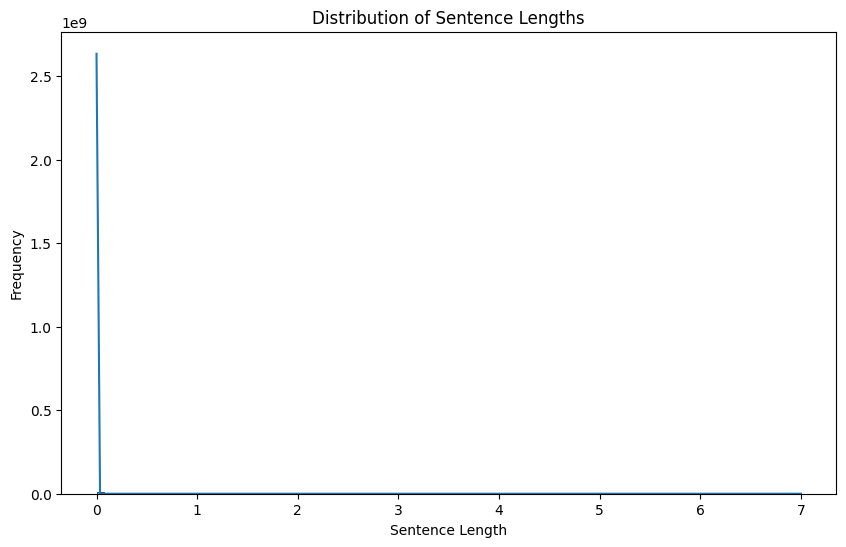

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the lengths of sentences using a histogram
plt.figure(figsize=(10,6))
sns.histplot(sentence_level_df['sentence_length']//1000, bins=100, kde=True)
plt.title('Distribution of Sentence Lengths')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Sort the DataFrame by 'sentence_length' in descending order
sorted_df = sentence_level_df.sort_values(by='sentence_length', ascending=False)

# Get the first 10 rows
first_10_lyrics = sorted_df.head(10)

print(first_10_lyrics)

                                         lyrics_sentences  smell_event  \
114058  bob bob bob bob bob bob bob bob bob bob bob bo...            0   
203072  why does it say that i created this why does i...            0   
103938  this your body this your body this your body t...            0   
50464   beep beep beep beep beep beep beepbeep beep be...            0   
159300  l l l l l l l l l l l l l l l l l l l l l l l ...            0   
162072  with a knife with a knife with a knife with a ...            0   
103938  this your body this your body this your body t...            0   
80023   he lookin likewhat he lookin likewhat he looki...            0   
249116  for the love of life for the love of lifefor t...            0   
59372   cody gang cody gang cody gang cody gang cody g...            0   

        sentence_length  
114058             7470  
203072             1432  
103938              946  
50464               573  
159300              520  
162072              485  
103

In [ ]:
# Sort the DataFrame by 'sentence_length' in descending order
sorted_df = sentence_level_df.sort_values(by='sentence_length', ascending=False)

# Get the indices of the first 5 rows
indices_to_remove = sorted_df.iloc[:5].index

# Drop the first 5 rows
sentence_level_df = sentence_level_df.drop(indices_to_remove)

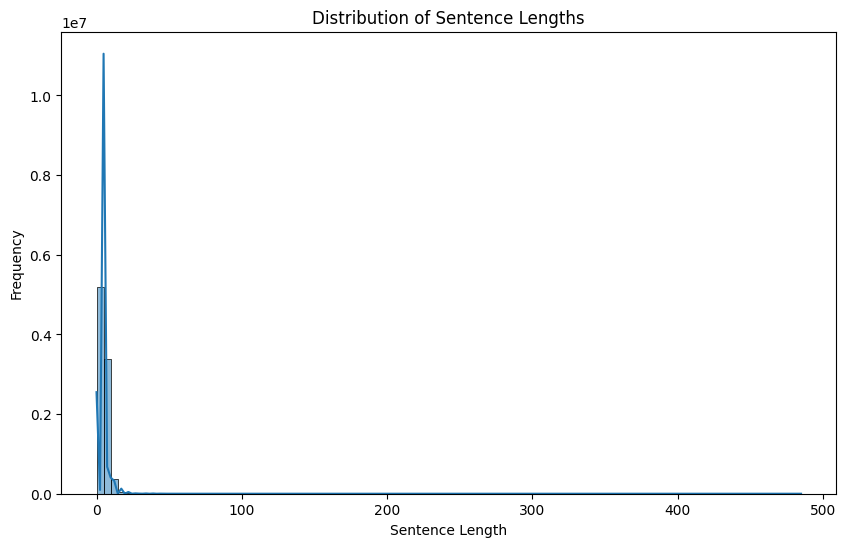

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the lengths of sentences using a histogram
plt.figure(figsize=(10,6))
sns.histplot(sentence_level_df['sentence_length'], bins=100, kde=True)
plt.title('Distribution of Sentence Lengths')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import os
import zipfile

# Save DataFrame to csv
sentence_level_df.to_csv('sentence_level_df.csv', index=False)

# Create a ZipFile object
with zipfile.ZipFile('sentence_level_df.zip', 'w') as zipf:
    # Add the file to the zip
    zipf.write('sentence_level_df.csv')

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Copy the zip file to Google Drive
!cp sentence_level_df.zip /content/drive/MyDrive/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the length of each sentence
sentence_level_df['sentence_length'] = sentence_level_df['lyrics_sentences'].apply(lambda x: len(x.split()))

# Visualize the lengths of sentences using a histogram
plt.figure(figsize=(10,6))
sns.histplot(sentence_level_df['sentence_length'], bins=50, kde=True)
plt.title('Distribution of Sentence Lengths')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Save DataFrame to csv
merged.to_csv('merged_df.csv', index=False)

from google.colab import drive
drive.mount('/content/drive')
!cp merged_df.csv /content/drive/MyDrive/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Save DataFrame to csv
sentence_level_df.to_csv('sentence_level_df.csv', index=False)

from google.colab import drive
drive.mount('/content/drive')
!cp sentence_level_df.csv /content/drive/MyDrive/

In [ ]:
# Save DataFrame to csv
df_filtered.to_csv('df_filtered.csv', index=False)

from google.colab import drive
drive.mount('/content/drive')
!cp df_filtered.csv /content/drive/MyDrive/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
